## Does synchronization hold after a graph is specialized?

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt
import networkx as nx


### Functions

In [2]:
def F(x):
    #Internal dynamics of each node
    return x**2 - x

In [13]:
def G(x):
    #External dynamics of each node
    #(Nothing)
    return x

In [11]:
def iterate(x0,f,iters=100):
    """
    Returns n length orbit of x0 under f
    Params
    ------
    x0 : scalar or ndarray
    f : function
    n : positive integer
    Returns
    -------
    orbit : ndarray- orbit of x0 under f
    """
    orbit = [x0]
    x = x0
    for i in range(iters):
        x = f(x)
        orbit.append(x)
    return np.array(orbit)

In [9]:
def getGraphDynam(F,G,A,d=.2):
    """
    Computes the orbit of x under the following equation:
    x_i[k+1] = F(x_i[k])+d*SUM_j{ A_ij*[G(x_i[k])-G(x_j[k])] }
         for j = 1,2, ... n
     Parameters
     ----------
     F (function): Internal dynamics of nodes
     G (function): How nodes affect eachother
     A (nxn ndarray): Adjacency Matrix
     d (float): dampening parameter
     
     Returns
     -------
     GraphDynam (function) : dynamics on graph as described above
    """
    deg = A.sum(axis=0)
    L = np.diag(deg) - A

    def GraphDynam(x):
        return F(x) + d*np.dot(L,G(x))
    
    return GraphDynam

In [117]:
def plotAllOrb(orb,k=0):
    #Plots every orbit
    m,n = orb.shape
    
    if k = 0:
        iteraxis = np.arange(m)
    if k < 0:
        
    
    plt.rcParams['figure.figsize'] = (10,5)
    for i in range(n):
        plt.plot(orb[k:,i],iteraxis,label="Node "+str(i+1))
    plt.xlabel("Iteration")
    plt.ylabel("Node Values")
    plt.legend()
    plt.show()
    print("Node variance in last iteration: {}".format(np.var(orb[-1])))

### Primary Network

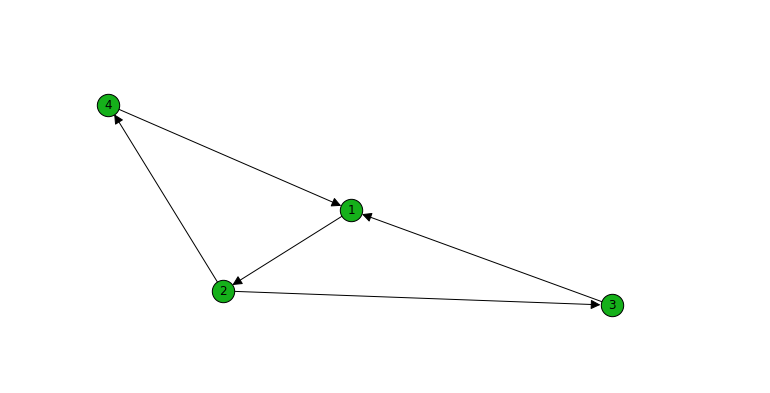

In [125]:
A = np.array([
    [0,0,1,1],
    [1,0,0,0],
    [0,1,0,0],
    [0,1,0,0]
])

Gr = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
labels = {0:'1',1:'2',2:'3',3:'4'}
options = {
    'node_color': '#15b01a',
    'node_size': 500,
    'width': 1,
    'arrowsize': 20,
    'with_labels':True,
    'labels':labels,
    'arrows':True
}
nx.draw(Gr,**options)
plt.show()


** Dynamics on the network **

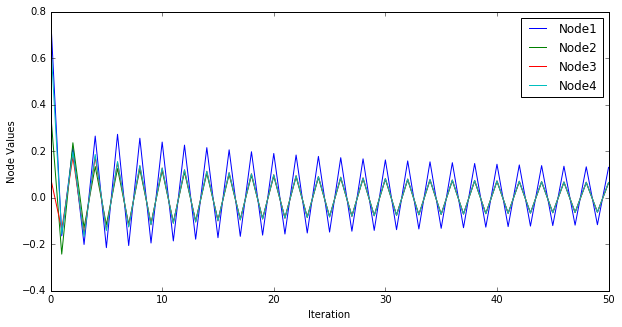

Node variance in last iteration: 0.000809568521157


In [126]:
#Initial Conditions on nodes
m,n = A.shape
x = np.random.rand(n)*2-1

GraphDyn = getGraphDynam(F,G,A,d=.2)
orbit = iterate(x,GraphDyn,iters=50)
plotAllOrb(orbit)

It looks like a chimera. We will look at the end of the orbit to see.

In [127]:
#Last four iterations
orbit[-6:,:]

array([[-0.11960813, -0.06361193, -0.06456843, -0.06456855],
       [ 0.13582   ,  0.06613526,  0.06854621,  0.06854632],
       [-0.11762743, -0.06247128, -0.06336544, -0.06336551],
       [ 0.13328435,  0.06491092,  0.06720179,  0.06720185],
       [-0.11574349, -0.06138999, -0.06222753, -0.06222758],
       [ 0.13088237,  0.06375143,  0.06593229,  0.06593233]])

We see that node 1, the first column, is not close to the other three nodes. Node 3 nad node 4 are very similar in value, and node 2 follows them closely but not perfectly.

It is important to point out that this type of dynamic behavior occured almost reguardless of starting point.

### Specialized Network

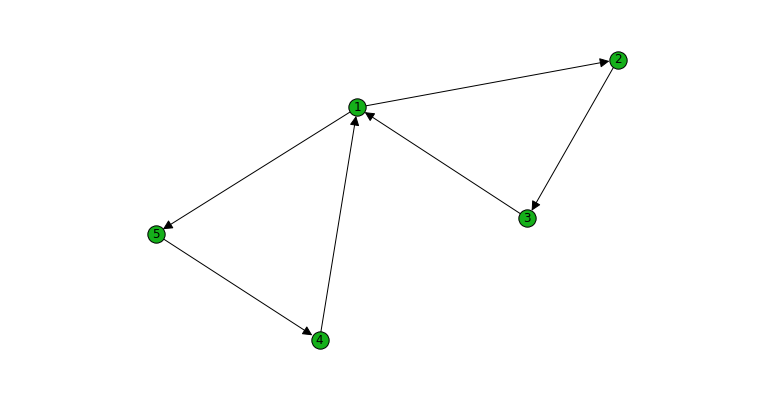

In [307]:
sA = np.array([
    [0,0,1,1,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,0,0,1],
    [1,0,0,0,0]
])

sGr = nx.from_numpy_matrix(sA.T,create_using=nx.DiGraph())
labels = {0:'1',1:'2',2:'3',3:'4',4:'5'}
options = {
    'arrows':True,
    'arrowsize':20,
    'node_color':'#15b01a',
    'labels':labels
}
nx.draw(sGr,**options)

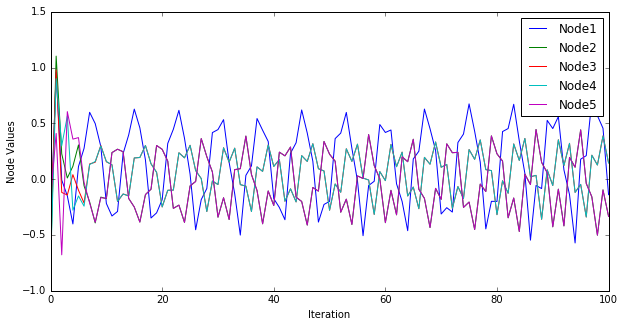

Node variance in last iteration: 0.0461961166485

Last four iterations:
[[ 0.70552355 -0.15798556  0.21532963  0.21532963 -0.15798556]
 [ 0.56954043 -0.5016882   0.12702017  0.12702017 -0.5016882 ]
 [ 0.45654024 -0.09594436  0.38758539  0.38758539 -0.09594436]
 [-0.13876953 -0.33288774  0.14600361  0.14600361 -0.33288774]]


In [400]:
#Random initialization
m,n = sA.shape
#x = np.random.rand(n)*2-1
strange = np.array([-0.43949292, -0.77124676, -0.51153516, -0.78003735, -0.16571637])
GraphDyn = getGraphDynam(F,G,sA,d=0.79285)
orbit = iterate(strange,GraphDyn,iters=100)
plotAllOrb(orbit)
print("\nLast four iterations:")
print(orbit[-4:,:])

I thought that this graph did not get to a chimera at a high d value, but it does and it is the strangest chimera I have seen. Nodes 2 and 5 synchronize and nodes 3 and 4 synchronize. It makes sense because of the symmetry in the graph, but it is very strange. The d value is right on the brink of destabilization. Most starting values diverge at this point.

### Other networks

For the following networks, we will look at synchronization and the effect of specialization

In [644]:
def netwDyn(A,d=.2,k=0,x0=None,iters=100):
    """
    Plot node dynamics using the functions above
    """
    m,n = A.shape
    labels = {}
    for i in range(n):
        labels[i]=str(i+1)
    gr = nx.from_numpy_matrix(A.T,create_using=nx.DiGraph())
    nx.draw(gr,arrows=True,node_color='#15b01a',labels=labels)
    plt.show()
    
    if x0 is None:
        x0 = np.random.rand(n)*2-1

    GraphDyn = getGraphDynam(F,G,A,d=d)
    orbit = iterate(x0,GraphDyn,iters=iters)
    plotAllOrb(orbit,k=k)
    print("\nLast four iterations:")
    print(orbit[-4:,:])
    return x0
    

### Chain
I'm including this as a sort of control

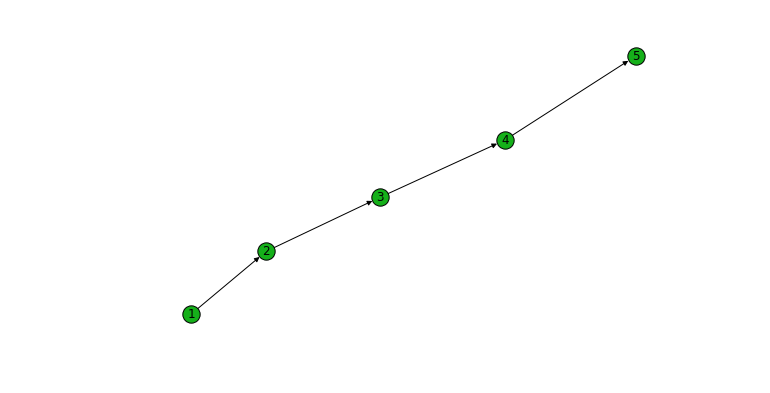

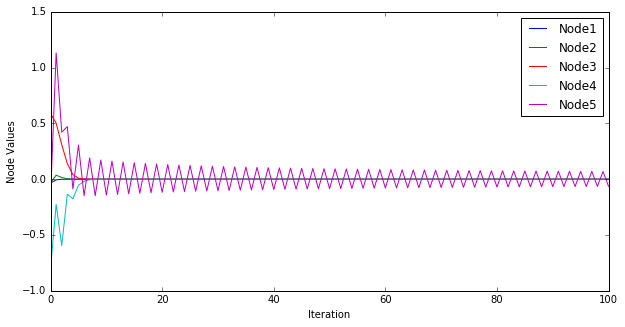

Node variance in last iteration: 0.000659353023282

Last four iterations:
[[-4.35159250e-70  2.54894189e-67 -7.32355824e-65  1.37685038e-62
   6.95994076e-02]
 [-8.70318501e-71  5.15010290e-68 -1.49529895e-65  2.84158345e-63
  -6.47553301e-02]
 [-1.74063700e-71  1.04046440e-68 -3.05239914e-66  5.86260277e-64
   6.89485828e-02]
 [-3.48127400e-72  2.10181645e-69 -6.22965400e-67  1.20914934e-64
  -6.41946758e-02]]


In [482]:
A = np.array([
    [0,0,0,0,0],
    [1,0,0,0,0],
    [0,1,0,0,0],
    [0,0,1,0,0],
    [0,0,0,1,0]
])

x0 = netwDyn(A,d=1.2)

No synchronization. By increasing the d value, I caused the first four nodes to converge to zero faster, but they did not synchronize as d increased. We probably need feedback to get synchronization. This is about as high as d can go. Unfortunately, this graph can't really be specialized because their is only one path through each node.

### Star

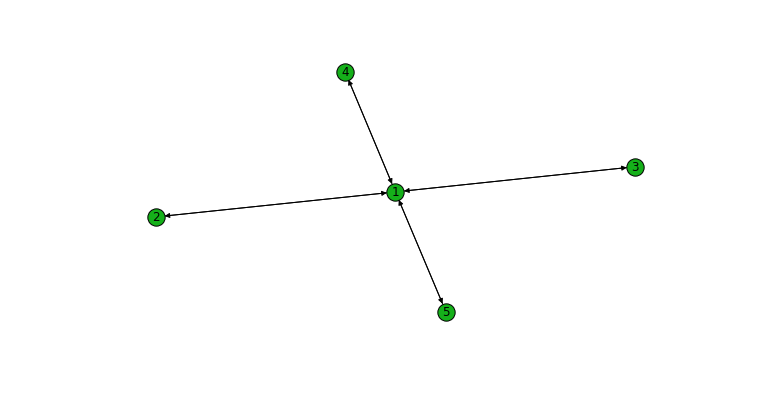

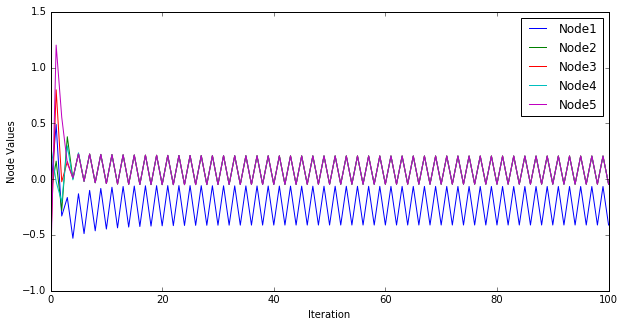

Node variance in last iteration: 0.021444311525

Last four iterations:
[[-0.06526493  0.2074852   0.2074852   0.2074852   0.2074852 ]
 [-0.41051579 -0.04442504 -0.04442504 -0.04442504 -0.04442504]
 [-0.06528072  0.20747855  0.20747855  0.20747855  0.20747855]
 [-0.41051403 -0.04441712 -0.04441712 -0.04441712 -0.04441712]]


In [275]:
nNodes = 5
A = np.zeros((nNodes,nNodes))
A[0,:] = np.ones(nNodes)
A[:,0] = np.ones(nNodes)

x = np.array([-0.12528123, -0.15031729, -0.62787999,  0.31038766, -0.8267249 ])
x0 = netwDyn(A,d=.44,x0=x)

I was able to get this one to form a chimera by fiddling with the d value and the starting point

Specializing this graph with nodes 2-5 as the base gives

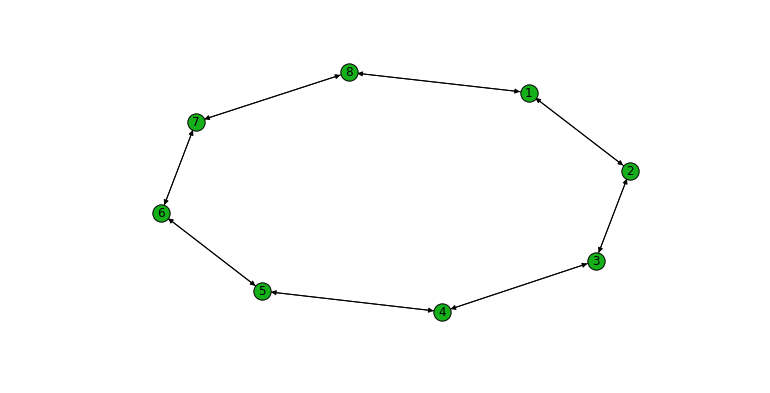

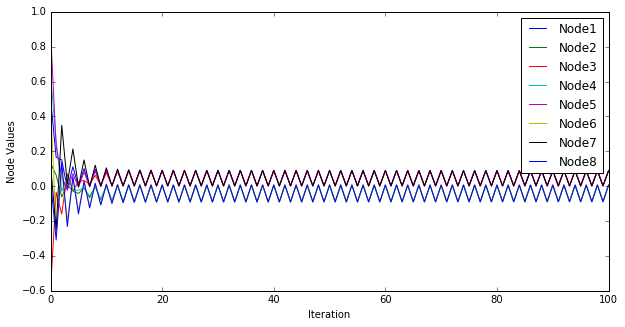

Node variance in last iteration: 0.00171425140636

Last four iterations:
[[ 0.00159825 -0.08919211  0.00159825 -0.08919211  0.00159825 -0.08919211
   0.00159825 -0.08919211]
 [ 0.08919467  0.00635698  0.08919467  0.00635698  0.08919467  0.00635698
   0.08919467  0.00635698]
 [ 0.00159871 -0.08915425  0.00159871 -0.08915425  0.00159871 -0.08915425
   0.00159871 -0.08915425]
 [ 0.08915681  0.00634977  0.08915681  0.00634977  0.08915681  0.00634977
   0.08915681  0.00634977]]


In [276]:
sA = np.diag(np.ones(7),1)
sA[7,0] = 1
sA = sA+sA.T
x = np.array([ 0.49994701,  0.13124205, -0.59186749,  0.63794641,  0.88885941,
        0.48825322,  0.12045578,  0.03700068])
x0 = netwDyn(sA,d=.5,x0=x)

Chimera where the groups are every other node!

### Graphs without symmetry

**Strongly connected:**

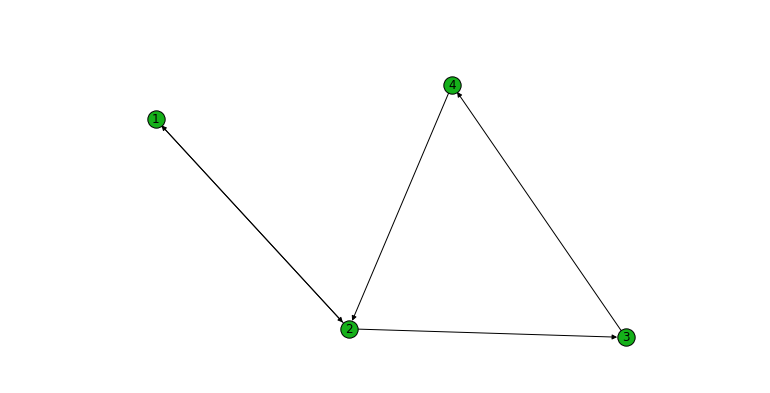

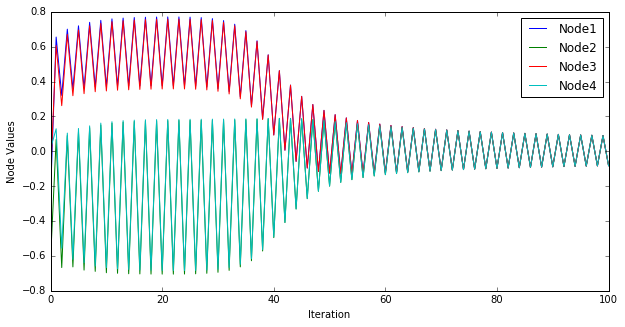

Node variance in last iteration: 3.4336131348e-11

Last four iterations:
[[ 0.09208013  0.09206457  0.09208013  0.09206458]
 [-0.08358691 -0.08360316 -0.08358691 -0.08360316]
 [ 0.09058879  0.09057754  0.09058879  0.09057754]
 [-0.082372   -0.08238372 -0.082372   -0.08238371]]


In [606]:
A = np.array([
    [0,1,0,0],
    [1,0,0,1],
    [0,1,0,0],
    [0,0,1,0]
])
x = np.array([-0.24763934, -0.61991745, -0.13973458,  0.01492809])

x0 = netwDyn(A,d=.930007,x0=x)

This is the wildest behavior I can get out of this graph. It synchronizes on it's d boundary.

Specializing it over nodes 1,3 and 4 gives:

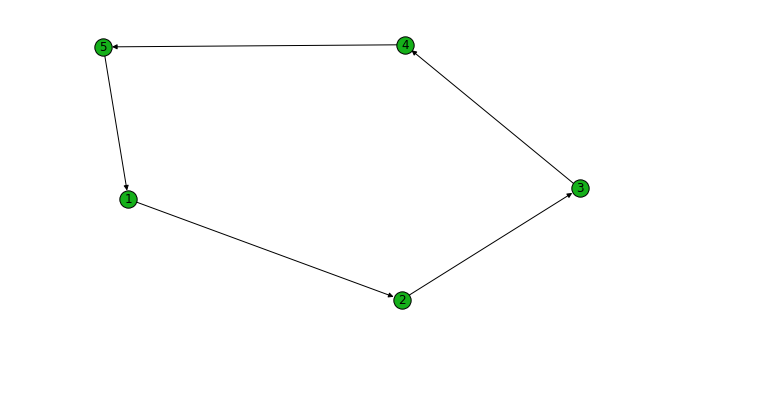

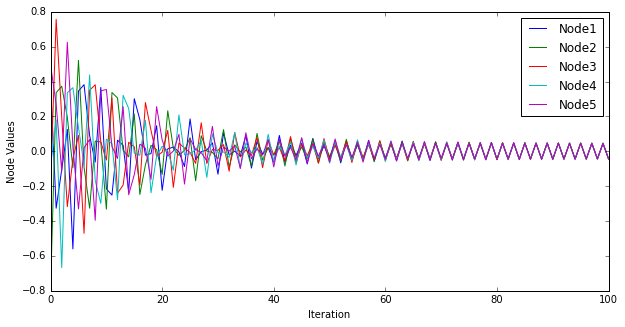

Node variance in last iteration: 3.30545987175e-07

Last four iterations:
[[ 0.04583428  0.04702473  0.04721841  0.04614743  0.04529282]
 [-0.04324619 -0.043742   -0.04481452 -0.04498173 -0.04401053]
 [ 0.04580433  0.04520913  0.04585759  0.04685459  0.04682153]
 [-0.04462178 -0.04370094 -0.04317106 -0.04376194 -0.04465903]]


In [726]:
A = np.diag(np.ones(4),-1)
A[0,4] = 1
x = np.array([ 0.39656355, -0.78391693, -0.18256241, -0.08468344,  0.49352781])
x0 = netwDyn(A,d=.9,iters=100,x0=x)

The above specialized graph synchronizes for d=.9 but increasing d to nearly the maximum it can be, we get a different type of behavior from the same initial value:

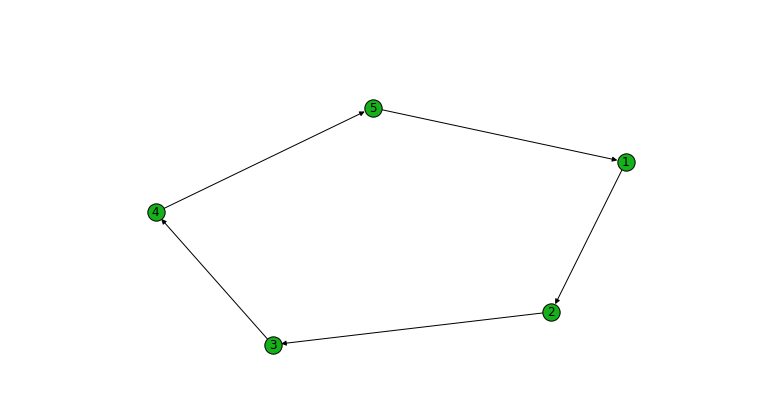

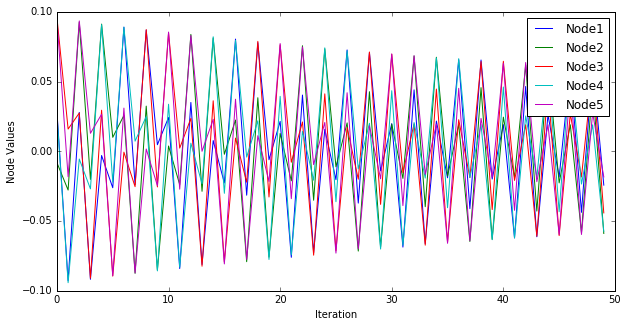

Node variance in last iteration: 0.000277960827635

Last four iterations:
[[ 0.05944814  0.01901286  0.02684055  0.06206815  0.04712595]
 [-0.04376401 -0.05852177 -0.0184018  -0.02348022 -0.05963855]
 [ 0.06133207  0.04739497  0.05829992  0.01902407  0.02754211]
 [-0.02425253 -0.05889109 -0.04414843 -0.05738933 -0.01838449]]


In [728]:
A = np.diag(np.ones(4),-1)
A[0,4] = 1
x = np.array([ 0.39656355, -0.78391693, -0.18256241, -0.08468344,  0.49352781])
x0 = netwDyn(A,d=.98603,k=-50,iters=300,x0=x)

In [700]:
x

array([ 0.16818707, -0.43439572, -0.23846979,  0.32696921,  0.85570234])